<a href="https://colab.research.google.com/github/joanby/matematicas-ml/blob/master/1_intro_to_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Álgebra Lineal

Este tema, *Introducción al Álgebra Lineal*, es el primero de la serie *Fundamentos del Aprendizaje Automático*.

Es esencial porque el álgebra lineal se encuentra en el corazón de la mayoría de los enfoques de aprendizaje automático y es especialmente predominante en el aprendizaje profundo, la rama de ML a la vanguardia de los avances actuales de inteligencia artificial. A través de la exposición mesurada de la teoría emparejada con ejemplos interactivos, desarrollará una comprensión de cómo se utiliza el álgebra lineal para resolver valores desconocidos en espacios de alta dimensión, lo que permite a las máquinas reconocer patrones y hacer predicciones.

El contenido cubierto en *Introducción al Álgebra Lienal* es en sí mismo fundamental para todos los demás temas de la serie Fundamentos Matemáticos del Machine Learning y es especialmente relevante para *Álgebra Lineal II*.

A lo largo del estudio de este tema, vamos a:

* Comprender los fundamentos del álgebra lineal, un enfoque omnipresente para resolver incógnitas dentro de espacios de alta dimensión.
* Desarrollar una intuición geométrica de lo que está pasando bajo el capó de los algoritmos de aprendizaje automático, incluidos los utilizados para el aprendizaje profundo.
* Ser capaces de comprender más íntimamente los detalles de los documentos de aprendizaje automático, así como todos los demás temas que subyacen ML, incluyendo el cálculo, la estadística y algoritmos de optimización.

**Tenga en cuenta que este notebook de Jupyter no está diseñado para ser utilizado solo. Es el código que acompaña a una clase o a los vídeos de la serie [Fundamentos Matemáticos de Machine Learning](https://github.com/joanby/matematicas-ml) de Juan Gabriel Gomila, que ofrecen detalles sobre lo siguiente:**

*Segmento 1: Estructuras de datos para álgebra*.

* Qué es el álgebra lineal  
* Breve historia del álgebra
* Tensores
* Escalares
* Vectores y Transposición de Vectores
* Normas y Vectores Unitarios
* Vectores Base, Ortogonales y Ortonormales
* Matrices en NumPy  
* Matrices
* Tensores en TensorFlow y PyTorch

*Segmento 2: Operaciones Tensoriales Comunes*

* Transposición de Tensores
* Aritmética Tensorial Básica
* Reducción
* El Producto Punto
* Resolución de sistemas lineales

*Segmento 3: Propiedades de las matrices*

* La norma de Frobenius
* Multiplicación de matrices
* Matrices simétricas y matrices identidad
* Inversión de matrices
* Matrices diagonales
* Matrices ortogonales

## Segmento 1: Estructuras de datos para álgebra

**Diapositivas utilizadas para comenzar el segmento, con un enfoque en la introducción de lo que es el álgebra lineal, incluyendo ejercicios prácticos de papel y lápiz.**

### Qué es Álgebra Lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = np.linspace(0, 40, 1000) # inicio, final, n puntos

Distancia recorrida por el ladrón: $d = 2.5t$

In [ ]:
d_r = 2.5 * t

Distancia recorrida por el Sheriff: $d = 3(t-5)$

In [ ]:
d_s = 3 * (t-5)

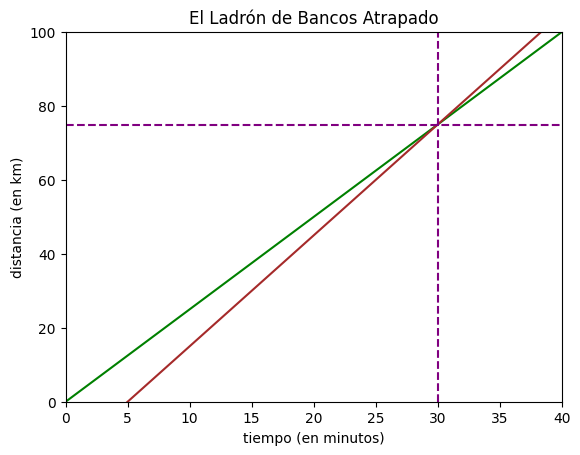

In [ ]:
fig, ax = plt.subplots()
plt.title('El Ladrón de Bancos Atrapado')
plt.xlabel('tiempo (en minutos)')
plt.ylabel('distancia (en km)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

**Volvemos a las slides.**

### Escalares (Tensores de Rango 0) en bases de Python

In [ ]:
x = 25
x

25

In [ ]:
type(x) # si queremos más especificidad (por ejemplo, int16, uint8), necesitamos NumPy u otra librería numérica

int

In [ ]:
y = 3

In [ ]:
py_sum = x + y
py_sum

28

In [ ]:
type(py_sum)

int

In [ ]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [ ]:
type(float_sum)

float

### Escalares en PyTorch

* PyTorch y TensorFlow son las dos librerías de *diferenciación automática* más populares (un foco de los temas [*Cálculo I*](https://github.com/joanby/matematicas-ml/blob/master/notebooks/3-calculus-i.ipynb) y [*Cálculo II*](https://github.com/joanby/matematicas-ml/blob/master/notebooks/4-calculus-ii.ipynb) de la serie *Fundamentos de ML*) en Python, a su vez el lenguaje de programación más popular en ML.
* Los tensores de PyTorch están diseñados para ser pitónicos, es decir, para sentirse y comportarse como las matrices de NumPy.
* La ventaja de los tensores de PyTorch respecto a los arrays de NumPy es que se pueden usar fácilmente para operaciones en la GPU (ver [aquí](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html) por ejemplo).
* La documentación sobre los tensores de PyTorch, incluyendo los tipos de datos disponibles, está [aquí](https://pytorch.org/docs/stable/tensors.html).

In [4]:
import torch

In [ ]:
x_pt = torch.tensor(25) # especificación de tipo opcional, por ejemplo: dtype=torch.float16
x_pt

tensor(25)

In [ ]:
x_pt.shape

torch.Size([])

### Escalares en TensorFlow (versión 2.0 o posterior)

Tensores creados con una envoltura, todo lo cual [se puede leer aquí](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

El más utilizado es `tf.Variable`, que usaremos aquí.

Al igual que con los tensores TF, en PyTorch podemos realizar operaciones similares, y podemos convertir fácilmente a y desde arrays NumPy.

Además, una lista completa de los tipos de datos de los tensores está disponible [aquí](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

In [3]:
import tensorflow as tf

In [ ]:
x_tf = tf.Variable(25, dtype=tf.int16) # dtype es opcional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [ ]:
x_tf.shape

TensorShape([])

In [ ]:
y_tf = tf.Variable(3, dtype=tf.int16)

In [ ]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [ ]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [ ]:
tf_sum.numpy() # veamos que las operaciones NumPy convierten automáticamente los tensores en matrices NumPy, y viceversa

28

In [ ]:
type(tf_sum.numpy())

numpy.int16

In [ ]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

**Vovlemos a las slides aquí.**

### Vectores (Tensores de rango 1) en NumPy

In [ ]:
import numpy as np

In [2]:
x = np.array([25, 2, 5]) # el parámetro type es opcional, p.ej.: dtype=np.float16
x

array([25,  2,  5])

In [ ]:
len(x)

3

In [ ]:
x.shape

(3,)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x[0] # zero-indexed

25

In [ ]:
type(x[0])

numpy.int64

### Transposición de Vectores

In [ ]:
# Transponer un array 1-D normal no tiene ningún efecto...
x_t = x.T
x_t

array([25,  2,  5])

In [ ]:
x_t.shape

(3,)

In [ ]:
# ...pero sí cuando utilizamos paréntesis anidados «tipo matriz»:
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [ ]:
y.shape

(1, 3)

In [ ]:
# ...pero se puede transponer una matriz de dimensión 1, lo que equivale matemáticamente a:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [ ]:
y_t.shape # Esto es un vector columna ya que tiene 3 filas y 1 columna

(3, 1)

In [ ]:
# El vector columna puede transponerse al vector fila original:
y_t.T

array([[25,  2,  5]])

In [ ]:
y_t.T.shape

(1, 3)

### Vectores nulos

No tienen efecto si se suman a otro vector

In [ ]:
z = np.zeros(3)
z

array([0., 0., 0.])

### Vectores en PyTorch y TensorFlow

In [5]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [6]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

**Volver a las slides aquí.**

### Norma $L^2$

In [ ]:
x

array([25,  2,  5])

In [ ]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [ ]:
np.linalg.norm(x)

25.573423705088842

Así, si las unidades en este espacio vectorial tridimensional son metros, entonces el vector $x$ tiene una longitud de 25.6m

**Volver a las slides aquí.**

### Norma $L^1$

In [ ]:
x

array([25,  2,  5])

In [ ]:
np.abs(25) + np.abs(2) + np.abs(5)

32

**Volver a las slides aquí.**

### Norma $L^2$ al Cuadrado

In [ ]:
x

array([25,  2,  5])

In [ ]:
(25**2 + 2**2 + 5**2)

654

In [ ]:
# Cubriremos la multiplicación tensorial más pronto pero para probar el producto escalar rápidamente:
np.dot(x, x)

654

**Volver a las slides aquí.**

### Norma del Máximo

In [ ]:
x

array([25,  2,  5])

In [ ]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

25

**Volver a las slides aquí.**

### Vectores Ortogonales

In [ ]:
i = np.array([1, 0])
i

array([1, 0])

In [ ]:
j = np.array([0, 1])
j

array([0, 1])

In [ ]:
np.dot(i, j) # detalles en el producto escalar próximamente...

0

**Volver a las slides aquí.**

### Matrices (Tensores de Rango 2) en NumPy

In [2]:
# Usamos array() con corchetes anidados:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.shape

(3, 2)

In [ ]:
X.size

6

In [ ]:
# Seleccionamos la columna izquierda de la matriz X (índice cero)
X[:,0]

array([25,  5,  3])

In [ ]:
# Seleccionamos la fila del medio de la matriz:
X[1,:]

array([ 5, 26])

In [ ]:
# Otro ejemplo de slicing-by-index:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

### Matrices en PyTorch

In [5]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [ ]:
X_pt.shape # pythonico relativo a PyTorch

torch.Size([3, 2])

In [ ]:
X_pt[1,:] # N.B.: Python se basa en índices que empiezan en cero; el álgebra se basa en índice que empieza en 1

tensor([ 5, 26])

### Matrices en TensorFlow

In [6]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [ ]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [ ]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

**Voler a las slides aquí.**

### Tensores de Rango Superior

Como ejemplo, los tensores de rango 4 son comunes para las imágenes, donde cada dimensión corresponde a:

1. Número de imágenes en el lote de entrenamiento, por ejemplo, 32
2. Altura de la imagen en píxeles, por ejemplo, 28 para [MNIST digits](http://yann.lecun.com/exdb/mnist/)
3. Anchura de la imagen en píxeles, p. ej., 28
4. Número de canales de color, por ejemplo, 3 para imágenes a todo color (RGB)

In [ ]:
images_pt = torch.zeros([32, 28, 28, 3])

In [ ]:
# images_pt

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

In [ ]:
images_tf = tf.zeros([32, 28, 28, 3])

In [ ]:
# images_tf

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


   

**Volver a las slides aquí.**

## Segmento 2: Operaciones con Tensores más comunes

### Transposición de Tensores

In [3]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [4]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [7]:
X_pt.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [8]:
tf.transpose(X_tf) # menos Pythonico

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

### Propiedades Aritméticas Básicas


Al sumar o multiplicar con escalares se aplica la operación a todos los elementos y se conserva la forma del tensor:

In [9]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [10]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [11]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [12]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [13]:
X_pt*2+2 # Los operadores de Python están sobrecargados; también podemos utilizar torch.mul() o torch.add()

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [14]:
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [15]:
X_tf*2+2 # Operadores igualmente sobrecargados; podríamos utilizar igualmente tf.multiply() tf.add()

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [16]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

Si dos tensores tienen el mismo tamaño, las operaciones se suelen aplicar por defecto de forma elemental. No se trata de **multiplicación de matrices**, que veremos más adelante, sino que se denomina **producto de Hadamard** o simplemente **producto elemento a elemento**.

La notación matemática es $A \odot X$.

In [17]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [18]:
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [19]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [20]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [21]:
A_pt = X_pt + 2

In [22]:
A_pt + X_pt

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [23]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [24]:
A_tf = X_tf + 2

In [25]:
A_tf + X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [26]:
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]], dtype=int32)>

### Reducción

Calcular la suma de todos los elementos de un tensor es una operación habitual. Por ejemplo:

* Para un vector ***x*** de longitud *n*, calculamos $\sum_{i=1}^{n} x_i$.
* Para la matriz ***X*** con *m* por *n* dimensiones, calculamos $\sum_{i=1}^{m} \sum_{j=1}^{n} X_{i,j}$

In [27]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [28]:
X.sum()

68

In [29]:
torch.sum(X_pt)

tensor(68)

In [30]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [31]:
# También puede hacerse a lo largo de un solo eje específico, por ejemplo:
X.sum(axis=0) # sumar sobre todas las filas

array([33, 35])

In [32]:
X.sum(axis=1) # sumar sobre todas las columnas

array([27, 31, 10])

In [33]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [34]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10], dtype=int32)>

Pueden aplicarse muchas otras operaciones con reducción a lo largo de todos los ejes o de una selección de ellos, p. ej:

* máximo
* mínimo
* media
* producto

Son bastante sencillas y se utilizan con menos frecuencia que la suma, así que te invitamos a buscarlas en los documentos de la biblioteca si alguna vez las necesitas.

### El Producto Escalar

Si tenemos dos vectores (digamos, ***x*** y ***y***) con la misma longitud *n*, podemos calcular el producto punto entre ellos. Esto se anota de varias maneras diferentes, incluyendo las siguientes:

* $x \cdot y$
* $x^Ty$
* $\langle x,y \rangle$.

Independientemente de la notación que utilices (yo prefiero la primera), el cálculo es el mismo; calculamos los productos de una manera elemento a elemento y luego sumamos reductivamente a través de los productos a un valor escalar. Es decir, $x \cdot y = \sum_{i=1}^{n} x_i y_i$.

El producto punto es omnipresente en el aprendizaje profundo: Se realiza en cada neurona artificial de una red neuronal profunda, que puede estar formada por millones (u órdenes de magnitud superiores) de estas neuronas.

In [7]:
x

array([25,  2,  5])

In [8]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [9]:
25*0 + 2*1 + 5*2

12

In [10]:
np.dot(x, y)

12

In [11]:
x_pt

tensor([25,  2,  5])

In [12]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [13]:
np.dot(x_pt, y_pt)

12

In [16]:
torch.dot(torch.tensor([25, 2, 5.]), torch.tensor([0, 1, 2.]))

tensor(12.)

In [17]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [18]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [19]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

**Volver a las slides aquí.**

### Resolución de Sistemas Lineales

En el ejemplo de **Sustitución**, las dos ecuaciones del sistema son:
$$ y = 3x $$
$$ -5x + 2y = 2 $$

La segunda ecuación puede reordenarse para aislar $y$:
$$ 2y = 2 + 5x $$
$$ y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2} $$

In [20]:
x = np.linspace(-10, 10, 1000) # inicio, final, n puntos

In [21]:
y1 = 3 * x

In [22]:
y2 = 1 + (5*x)/2

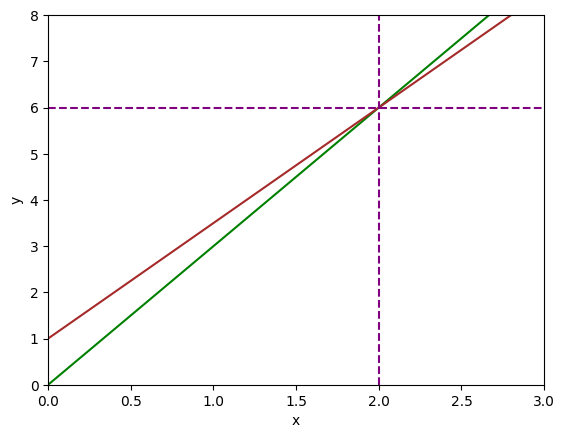

In [23]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 3])
ax.set_ylim([0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

**Volver a las slides aquí.**

En el ejemplo de **Eliminación**, las dos ecuaciones del sistema son:
$$ 2x - 3y = 15 $$
$$ 4x + 10y = 14 $$

Ambas ecuaciones pueden reordenarse para aislar $y$. A partir de la primera ecuación:
$$ -3y = 15 - 2x $$
$$ y = \frac{15 - 2x}{-3} = -5 + \frac{2x}{3} $$

Si operamos con la segunda ecuación:
$$ 4x + 10y = 14 $$
$$ 2x + 5y = 7 $$
$$ 5y = 7 - 2x $$
$$ y = \frac{7 - 2x}{5} $$

In [24]:
y1 = -5 + (2*x)/3

In [25]:
y2 = (7-2*x)/5

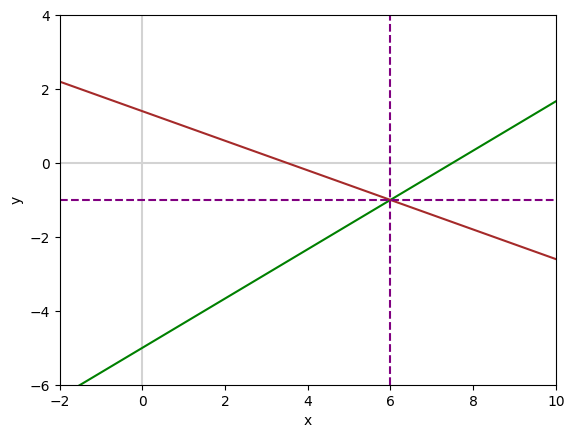

In [26]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# Añadimos los ejes x e y:
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=6, color='purple', linestyle='--')
_ = plt.axhline(y=-1, color='purple', linestyle='--')

**Volver a las slides aquí.**

## Segmento 3: Propiedades de las Matrices

### La Norma de Frobenius

In [ ]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [ ]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [ ]:
np.linalg.norm(X) # la misma función que para la norma vectorial L2

5.477225575051661

In [ ]:
X_pt = torch.tensor([[1, 2], [3, 4.]]) # torch.norm() solamente soporta floats

In [ ]:
torch.norm(X_pt)

tensor(5.4772)

In [ ]:
X_tf = tf.Variable([[1, 2], [3, 4.]]) # tf.norm() solamente soporta floats

In [ ]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

**Volver a las slides aquí.**

### Multiplicación de Matrices (por un Vector)

In [ ]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
b = np.array([1, 2])
b

array([1, 2])

In [ ]:
np.dot(A, b) # aunque técnicamente el producto punto es sólo entre vectores

array([11, 17, 23])

In [ ]:
A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
b_pt = torch.tensor([1, 2])
b_pt

tensor([1, 2])

In [ ]:
torch.matmul(A_pt, b_pt) # como np.dot(), infiere automáticamente las dimensiones para realizar producto punto, matvec, o multiplicación de matrices.

tensor([11, 17, 23])

In [ ]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [ ]:
b_tf = tf.Variable([1, 2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [ ]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23], dtype=int32)>

**Volver a las slides aquí.**

### Multiplicación de Matrices (con Dos Matrices)

In [ ]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [ ]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

Tenga en cuenta que la multiplicación de matrices no es "conmutativa" (es decir, $AB \neq BA$) por lo que al descomentar la línea siguiente se producirá un error de desajuste de tamaño:

In [ ]:
# np.dot(B, A)

In [ ]:
B_pt = torch.from_numpy(B) # más limpia que la conversión de TF
B_pt

tensor([[1, 9],
        [2, 0]])

In [ ]:
# otra forma de crear el mismo tensor con transposición:
B_pt = torch.tensor([[1, 2], [9, 0]]).T
B_pt

tensor([[1, 9],
        [2, 0]])

In [ ]:
torch.matmul(A_pt, B_pt) # no se necesita cambiar la función, a diferencia de TF

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [ ]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]], dtype=int32)>

In [ ]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]], dtype=int32)>

**Volver a las slides aquí.**

### Matrices Simétricas

In [ ]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

**Volver a las slides aquí.**

### Matrices Identidad

In [ ]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [ ]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [ ]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

**Volver a las slides aquí.**

### Respuestas a las preguntas sobre multiplicación de matrices

In [ ]:
M_q = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
M_q

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
V_q = torch.tensor([[-1, 1, -2], [0, 1, 2]]).T
V_q

tensor([[-1,  0],
        [ 1,  1],
        [-2,  2]])

In [ ]:
torch.matmul(M_q, V_q)

tensor([[ -3,   5],
        [ -9,  14],
        [-15,  23]])

### Inversión de Matrices

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [ ]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

Como un rápido aporte, vamos a demostrar que $X^{-1}X = I_n$ según las diapositivas:

In [ ]:
np.dot(Xinv, X)

array([[1.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 1.00000000e+00]])

...y ahora volvemos a resolver las incógnitas en $w$:

In [ ]:
y = np.array([4, -7])
y

array([ 4, -7])

In [ ]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

De modo que $y = Xw$:

In [ ]:
np.dot(X, w)

array([ 4., -7.])

**Visualización Geométrica**

Recordando de las diapositivas que las dos ecuaciones del sistema son:
$$ 4b + 2c = 4 $$
$$ -5b - 3c = -7 $$

Ambas ecuaciones pueden reordenarse para aislar una variable, digamos $c$. A partir de la primera ecuación:
$$ 4b + 2c = 4 $$
$$ 2b + c = 2 $$
$$ c = 2 - 2b $$

Entonces para la segunda ecuación:
$$ -5b - 3c = -7 $$
$$ -3c = -7 + 5b $$
$$ c = \frac{-7 + 5b}{-3} = \frac{7 - 5b}{3} $$

In [ ]:
b = np.linspace(-10, 10, 1000) # inicio, final, n puntos

In [ ]:
c1 = 2 - 2*b

In [ ]:
c2 = (7-5*b)/3

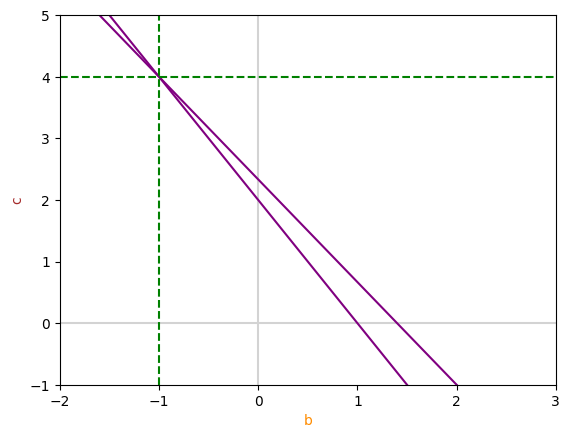

In [ ]:
fig, ax = plt.subplots()
plt.xlabel('b', c='darkorange')
plt.ylabel('c', c='brown')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(b, c1, c='purple')
ax.plot(b, c2, c='purple')
plt.axvline(x=-1, color='green', linestyle='--')
_ = plt.axhline(y=4, color='green', linestyle='--')

En PyTorch y TensorFlow:

In [ ]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # tipo float

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [ ]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]])) # también float

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999998,  0.9999998],
       [-2.4999995, -1.9999996]], dtype=float32)>

**Ejercicios**:

1. Como se hizo anteriormente con NumPy, utilizar PyTorch para calcular $w$ a partir de $X$ e $y$. Posteriormente, confirmar que $y = Xw$.
2. Repetir de nuevo, ahora utilizando TensorFlow.

**Volver a las slides aquí.**

### Inversión de la matriz cuando no hay solución

In [ ]:
X = np.array([[-4, 1], [-8, 2]])
X

array([[-4,  1],
       [-8,  2]])

In [ ]:
# Descomentar la línea siguiente da lugar a un error de "matriz singular
# Xinv = np.linalg.inv(X)

Siéntase libre de intentar invertir una matriz no cuadrada; esto también arrojará un error.

**Vuelve a las slides aquí.**

### Matrices Ortogonales

Estas son las soluciones a los Ejercicios 3 y 4 sobre **matrices ortogonales** de las diapositivas.

En el Ejercicio 3, para demostrar que la matriz $I_3$ tiene columnas mutuamente ortogonales, demostramos que el producto escalar de cualquier par de columnas es cero:

In [ ]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [ ]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [ ]:
column_3 = I[:,2]
column_3

array([0, 0, 1])

In [ ]:
np.dot(column_1, column_2)

0

In [ ]:
np.dot(column_1, column_3)

0

In [ ]:
np.dot(column_2, column_3)

0

Podemos utilizar el método `np.linalg.norm()` de antes en el cuaderno para demostrar que cada columna de $I_3$ tiene norma unitaria:

In [ ]:
np.linalg.norm(column_1)

1.0

In [ ]:
np.linalg.norm(column_2)

1.0

In [ ]:
np.linalg.norm(column_3)

1.0

Como la matriz $I_3$ tiene columnas mutuamente ortogonales y cada columna tiene norma unitaria, los vectores columna de $I_3$ son *ortonormales*. Dado que $I_3^T = I_3$, esto significa que las *filas* de $I_3$ también deben ser ortonormales.

Puesto que las columnas y las filas de $I_3$ son ortonormales, $I_3$ es una *matriz ortogonal*.

Para el Ejercicio 4, vamos a repetir los pasos del Ejercicio 3 con la matriz *K* en lugar de $I_3$. Podríamos usar NumPy de nuevo, pero por diversión usaré PyTorch en su lugar. (¡Eres bienvenido a intentarlo con TensorFlow si te sientes con ganas!).

In [ ]:
K = torch.tensor([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]])
K

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

In [ ]:
Kcol_1 = K[:,0]
Kcol_1

tensor([ 0.6667, -0.6667,  0.3333])

In [ ]:
Kcol_2 = K[:,1]
Kcol_2

tensor([0.3333, 0.6667, 0.6667])

In [ ]:
Kcol_3 = K[:,2]
Kcol_3

tensor([ 0.6667,  0.3333, -0.6667])

In [ ]:
torch.dot(Kcol_1, Kcol_2)

tensor(0.)

In [ ]:
torch.dot(Kcol_1, Kcol_3)

tensor(0.)

In [ ]:
torch.dot(Kcol_2, Kcol_3)

tensor(0.)

Ahora hemos determinado que las columnas de $K$ son ortogonales.

In [ ]:
torch.norm(Kcol_1)

tensor(1.)

In [ ]:
torch.norm(Kcol_2)

tensor(1.)

In [ ]:
torch.norm(Kcol_3)

tensor(1.)

Ahora hemos determinado que, además de ser ortogonales, las columnas de $K$ tienen norma unitaria, por lo tanto son ortonormales.

Para asegurar que $K$ es una matriz ortogonal, tendríamos que demostrar que no sólo tiene columnas ortonormales sino que también tiene filas ortonormales. Desde $ K^T \neq K $, no podemos demostrar esto tan directamente como lo hicimos con $ I_3 $.

Un enfoque sería repetir los pasos que utilizamos para determinar que $K$ tiene columnas ortogonales con todas las filas de la matriz (por favor, siéntase libre de hacerlo). Alternativamente, podemos utilizar una ecuación específica de matriz ortogonal de las diapositivas, $A^TA = I$, para demostrar que $K$ es ortogonal en una sola línea de código:

In [ ]:
torch.matmul(K.T, K)

tensor([[ 1.0000e+00, -3.3114e-09,  3.3114e-09],
        [-3.3114e-09,  1.0000e+00,  6.6227e-09],
        [ 3.3114e-09,  6.6227e-09,  1.0000e+00]])

A pesar de los errores de redondeo que podemos ignorar con seguridad, esto confirma que $K^TK = I$ y por lo tanto $K$ es una matriz ortogonal.